# Задание 1.

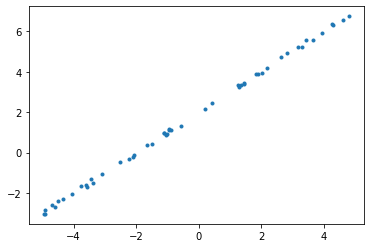

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from criteria import StopLossCriteria, CountStopLossCriteria
from gradient import gradient, NaiveGradient, Momentum, Nesterov, AdaGrad, RMSProp, Adam
from graphic import F, G, F3d, F10d
from loss import AbsoluteLoss
from time import time

F().draw()

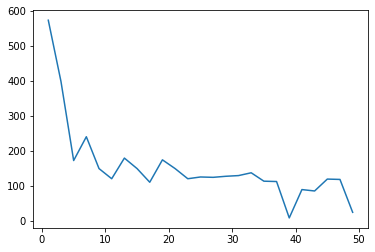

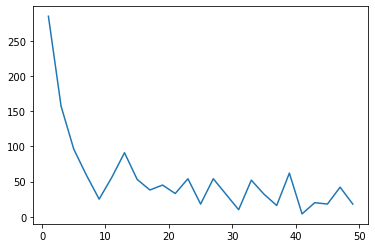

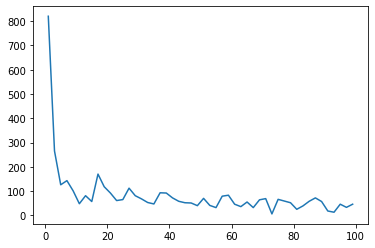

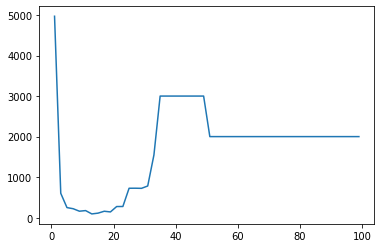

In [2]:
for graphic in [F(), G(), F3d(), F10d()]:
    count_points = graphic.points_x.shape[0]
    batch_sizes = [i for i in range(1, count_points + 1, 2)]
    w = np.array([0] * (graphic.linear.n + 1))
    epoches = np.array([gradient(graphic, 0.1, w, AbsoluteLoss(), 1000,
                                     batch_size, StopLossCriteria(), graphic.noise_sum)[0]
                        for batch_size in batch_sizes])
    plt.plot(batch_sizes, epoches)
    plt.show()

# Задание 2

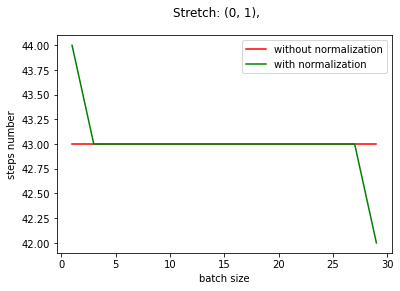

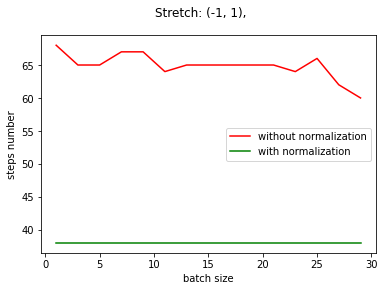

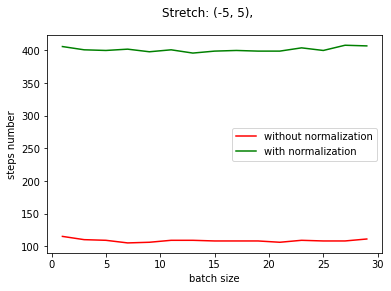

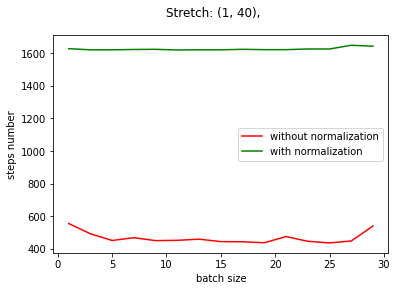

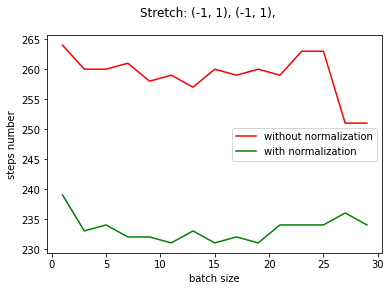

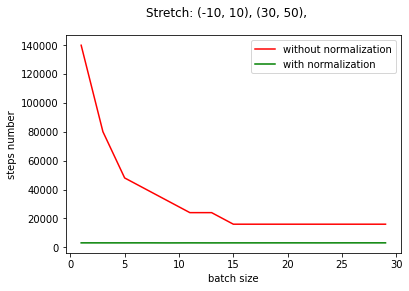

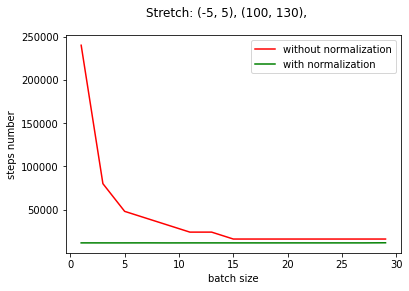

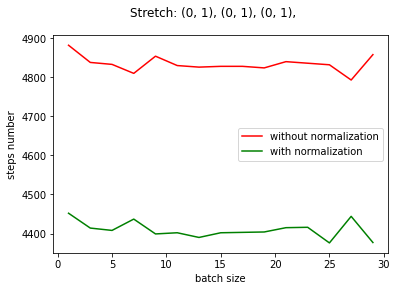

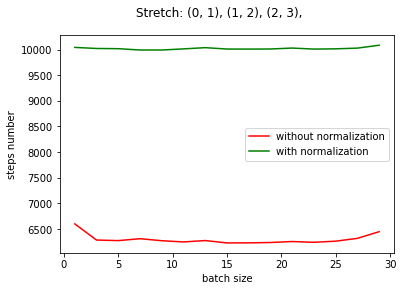

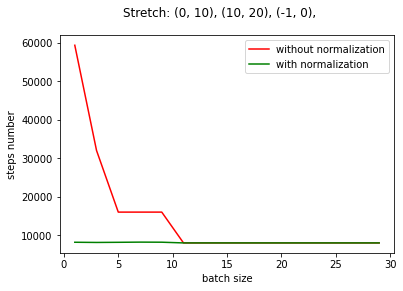

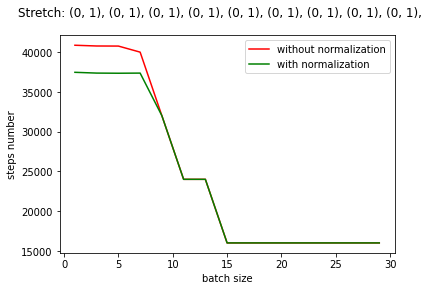

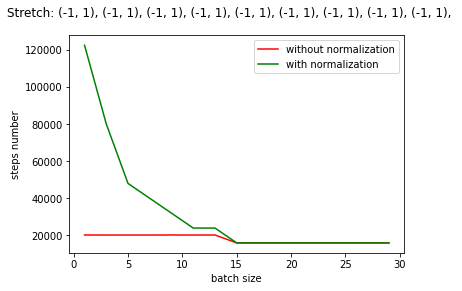

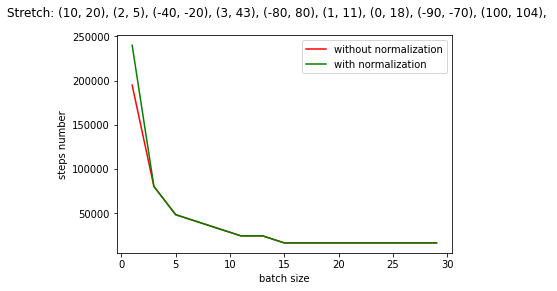

In [3]:
from task_2 import analise

analise(print_log=False)

# Задание 3. Исследовать модификации градиентного спуска.

In [ ]:
for graphic in [F(), F3d(), F10d()]:
    count_points = graphic.points_x.shape[0]
    batch_sizes = [i for i in range(1, count_points + 1, 5)]
    n = graphic.linear.n + 1

    fig, axs = plt.subplots(2, 3)
    plt.subplots_adjust(hspace=0.8)
    fig.suptitle(f"Dims: {graphic.linear.n}")

    i_idx = 0
    j_idx = 0
    test_count = 4

    for grad in [NaiveGradient(), Momentum(n, 0.9), Nesterov(n, 0.9),
                AdaGrad(n), RMSProp(n, 0.99), Adam(n, 0.9, 0.99)]:
        print(str(grad))

        w = np.array([0] * (graphic.linear.n + 1))
        epoches = np.array([[gradient(graphic, 0.1, w, AbsoluteLoss(), 1000,
                                     batch_size, CountStopLossCriteria(20), graphic.noise_sum, grad)[0]
                                for batch_size in batch_sizes]
                                for it in range(test_count)])
        epoches = np.sum(epoches, 0) / test_count

        axs[j_idx, i_idx].set_title(str(grad))
        axs[j_idx, i_idx].plot(batch_sizes, epoches)

        i_idx += 1
        j_idx += i_idx // 3
        i_idx %= 3

    plt.show()

NaiveGradient()
Momentum(0.9)
Nesterov(0.9)
AdaGrad()
RMSProp(0.99)


# Задние 4. Исследовать сходимость алгоритмов. Сравнить различные методы по скорости сходимости, надёжности, машинным ресурсам.

In [ ]:
graphic = F10d()
n = graphic.linear.n + 1
batch_size = graphic.points_x.shape[0] // 3

for grad in [NaiveGradient(), Momentum(n, 0.9), Nesterov(n, 0.9),
             AdaGrad(n), RMSProp(n, 0.999), Adam(n, 0.9, 0.99)]:
    print(str(grad))
    start = time()
    epoches, w = gradient(graphic, 0.1, np.array([0] * n), AbsoluteLoss(), 5000,
                          batch_size, CountStopLossCriteria(5), 5e-5, grad)
    print(f"Max difference of dimension: {np.max(np.abs((graphic.linear.a - w) / graphic.linear.a))}")
    print(f"Epoches(Operations): {epoches}")
    print(f"Memory: {grad.get_memory_cost(batch_size)}")
    print(f"Time: {time() - start} s")
    print()

# Задание 5

In [ ]:
from task_5 import draw_analisys
draw_analisys()